<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/HW5/hacking_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pylab as pl
#!pip install astropy
import astropy
from astropy import units as u

# apparently `%pylab inline` is depracated
%matplotlib inline


# Derive empirically the value of $\pi$ knwoing that the ratio of the area of the square and the inscribed circle is π / 4.



In [27]:
def square(l, ax):
  ax.plot([-l, l], [-l, -l], 'k-')
  ax.plot([-l, l], [l, l], 'k-')
  ax.plot([-l, -l], [-l, l], 'k-')
  ax.plot([l, l], [-l, l], 'k-')


In [28]:
def circle(l, ax):
  theta = np.linspace(0, 360, 100)
  theta *= u.degree
  x = l * np.cos(theta.to(u.rad))
  y = l * np.sin(theta.to(u.rad))
  ax.plot(x, y, 'k-')


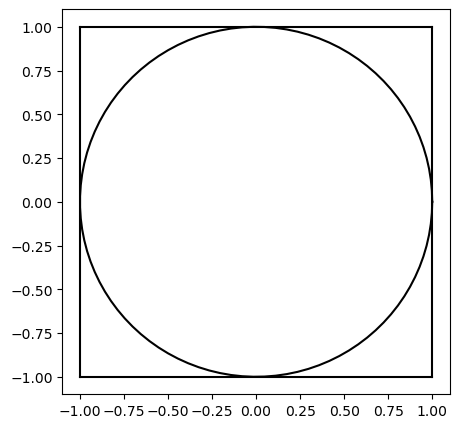

In [29]:
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)

Caption: A circle inscribed in a square centered at the origin with side length 2. This is just to test if functions are correctly working.

In [30]:
# define a function that determins if a random point in the square is inside or outside of the circle
def isin(x, y, l):
  return x**2 + y**2 < l**2
# < vs <= won't matter for the approximation as both will converge at the same rate

In [31]:
# draw a bunch coordinates (x,y) inside the suqre. how many?
# remember what to do before starting the random calls
seed = 0
n = 10**4
l = 1
np.random.seed(0)
sample = 2*l*np.random.random_sample(size=(n,2)) - l
# NOTE: this function only samples from [-l, l) by [-l, l), so it's technically missing the upper bounds
# However, similar to the isin function this will affect neither convergence or convergence speed.

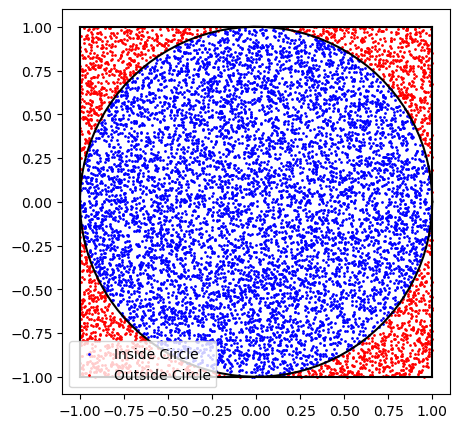

In [32]:
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)
isin_mask = isin(sample[:,0], sample[:,1], 1)


pl.scatter(sample[isin_mask,0],  sample[isin_mask,1],  color='b', label='Inside Circle',  s=1)
pl.scatter(sample[~isin_mask,0], sample[~isin_mask,1], color='r', label='Outside Circle', s=1)
pl.legend()

Caption: A circle inscribed in a square centered on the origin with side length 2. Ten thousand points have been uniformly sampled from inside the square and colored based on their location. Blue are inside the circle while red are between the circle and the square. The ratio of blue to red points should converge to pi/4 as the number of points increases. The result of this plot measured pi to be 3.122800 only 0.598% different from the internal numpy pi value. 

In [33]:
# what is the ratio of points in and out of the circle? can you get to pi from it?
isin_ratio = np.sum(isin_mask)/n
pi_approx = 4*isin_ratio

In [34]:
print(f'From the seed {seed} with parameters point number {n} and radius {l:0.3f}, pi was found to be approximately {pi_approx:f}.')
print(f'This has a percent error of {100*np.abs(np.pi-pi_approx)/np.pi:0.3f}%')

From the seed 0 with parameters point number 10000 and radius 1.000, pi was found to be approximately 3.122800.
This has a percent error of 0.598%
